## **Wine Quality Analysis + Prediction Model 🍷🍇**

<img src="https://images.unsplash.com/photo-1568213816046-0ee1c42bd559?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1772&q=80">

### Wine Quality Prediction (Case Study) ☘️

The dataset given here contains the data about quality of a wine. The dataset is about the about all those parameters that can help us to get quality of a wine. Below is the description of all the columns in the dataset:

* Fixed Acidity: Unchangable Acidity of a wine;
* Volatile Acidity: Volatile Acidity of a wine;
* Citric Acid: Component of citric acid in your wine;
* Residual Sugar: Residual of sugar in a wine;
* Chlorides: The amount of chloride in the wine;
* Free Sulfur Dioxide: The free sulfur dioxide in the wine;
* Total Sulfur Dioxide: The amount of sulfur dioxide in the wine;
* pH: The pH score of the wine;
* Sulphates: The amount of sulphates in the wine;
* Alchol: The amount of alchol in the wine;
* Quality: We rate the quality of wine out of 10.


I hope you now have understood everything about this dataset. Now in the section below, I will take you through the task of quality prediction with machine learning using Python.

### **Import Packages & Data 🐶**

In [1]:
!pip install plotly --quiet

#### **Packages 🦊**

In [2]:
# Main Library
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Machine Learning Libarary
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Special Library
import missingno as msno

# Seaborn Style
sns.set(color_codes = True)
sns.set_style("white")

#### **Import Dataset 🦉**

In [3]:
df = pd.read_csv("../input/winequalityred/winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### **Observations** 🦕

* Fixed Acidity: Unchangable Acidity of a wine 🗿
* Volatile Acidity: Volatile Acidity of a wine ⚔️
* Citric Acid: Component of citric acid in your wine 🛡️
* Residual Sugar: Residual of sugar in a wine 🪓
* Chlorides: The amount of chloride in the wine 🧨
* Free Sulfur Dioxide: The free sulfur dioxide in the wine 🎭
* Total Sulfur Dioxide: The amount of sulfur dioxide in the wine 🔥
* pH: The pH score of the wine ☘️
* Sulphates: The amount of sulphates in the wine 🏈
* Alchol: The amount of alchol in the wine ☀️
* Quality: We rate the quality of wine out of 10 🌎

### **Data Exploration & Cleaning ☘️**

#### **Data Shape & Structure 🐋**

In [4]:
df.shape

(1596, 12)

#### **Observations** 🦕
* Row count is 1596 ⚔️.
* Column count is 12 🚬.

#### **Data Inspection** 🎭

In [5]:
# Let's inspect the missing values 🐢
data_info= pd.DataFrame()
data_info['Column Names']= df.columns
data_info['Datatype'] = df.dtypes.to_list()
data_info['num_NA']= data_info['Column Names'].apply(lambda x: df[x].isna().sum())
data_info['%_NA']= data_info['Column Names'].apply(lambda x: df[x].isna().mean())
data_info

,Column Names,Datatype,num_NA,%_NA
0,fixed acidity,float64,0,0.0
1,volatile acidity,float64,0,0.0
2,citric acid,float64,0,0.0
3,residual sugar,float64,0,0.0
4,chlorides,float64,0,0.0
5,free sulfur dioxide,float64,0,0.0
6,total sulfur dioxide,float64,0,0.0
7,density,float64,0,0.0
8,pH,float64,0,0.0
9,sulphates,float64,0,0.0


#### **Observations** 🦕
* Numerical Columns 🍂
         All Data is Numerical✔️
* Categorical Columns ☘️
         No Categorical Data ❌
* Fortunately there are no missing values ⚔️.
* Datatypes are appropreiate 🚬.

### **Data Distribution Analysis 🌋🏔️**

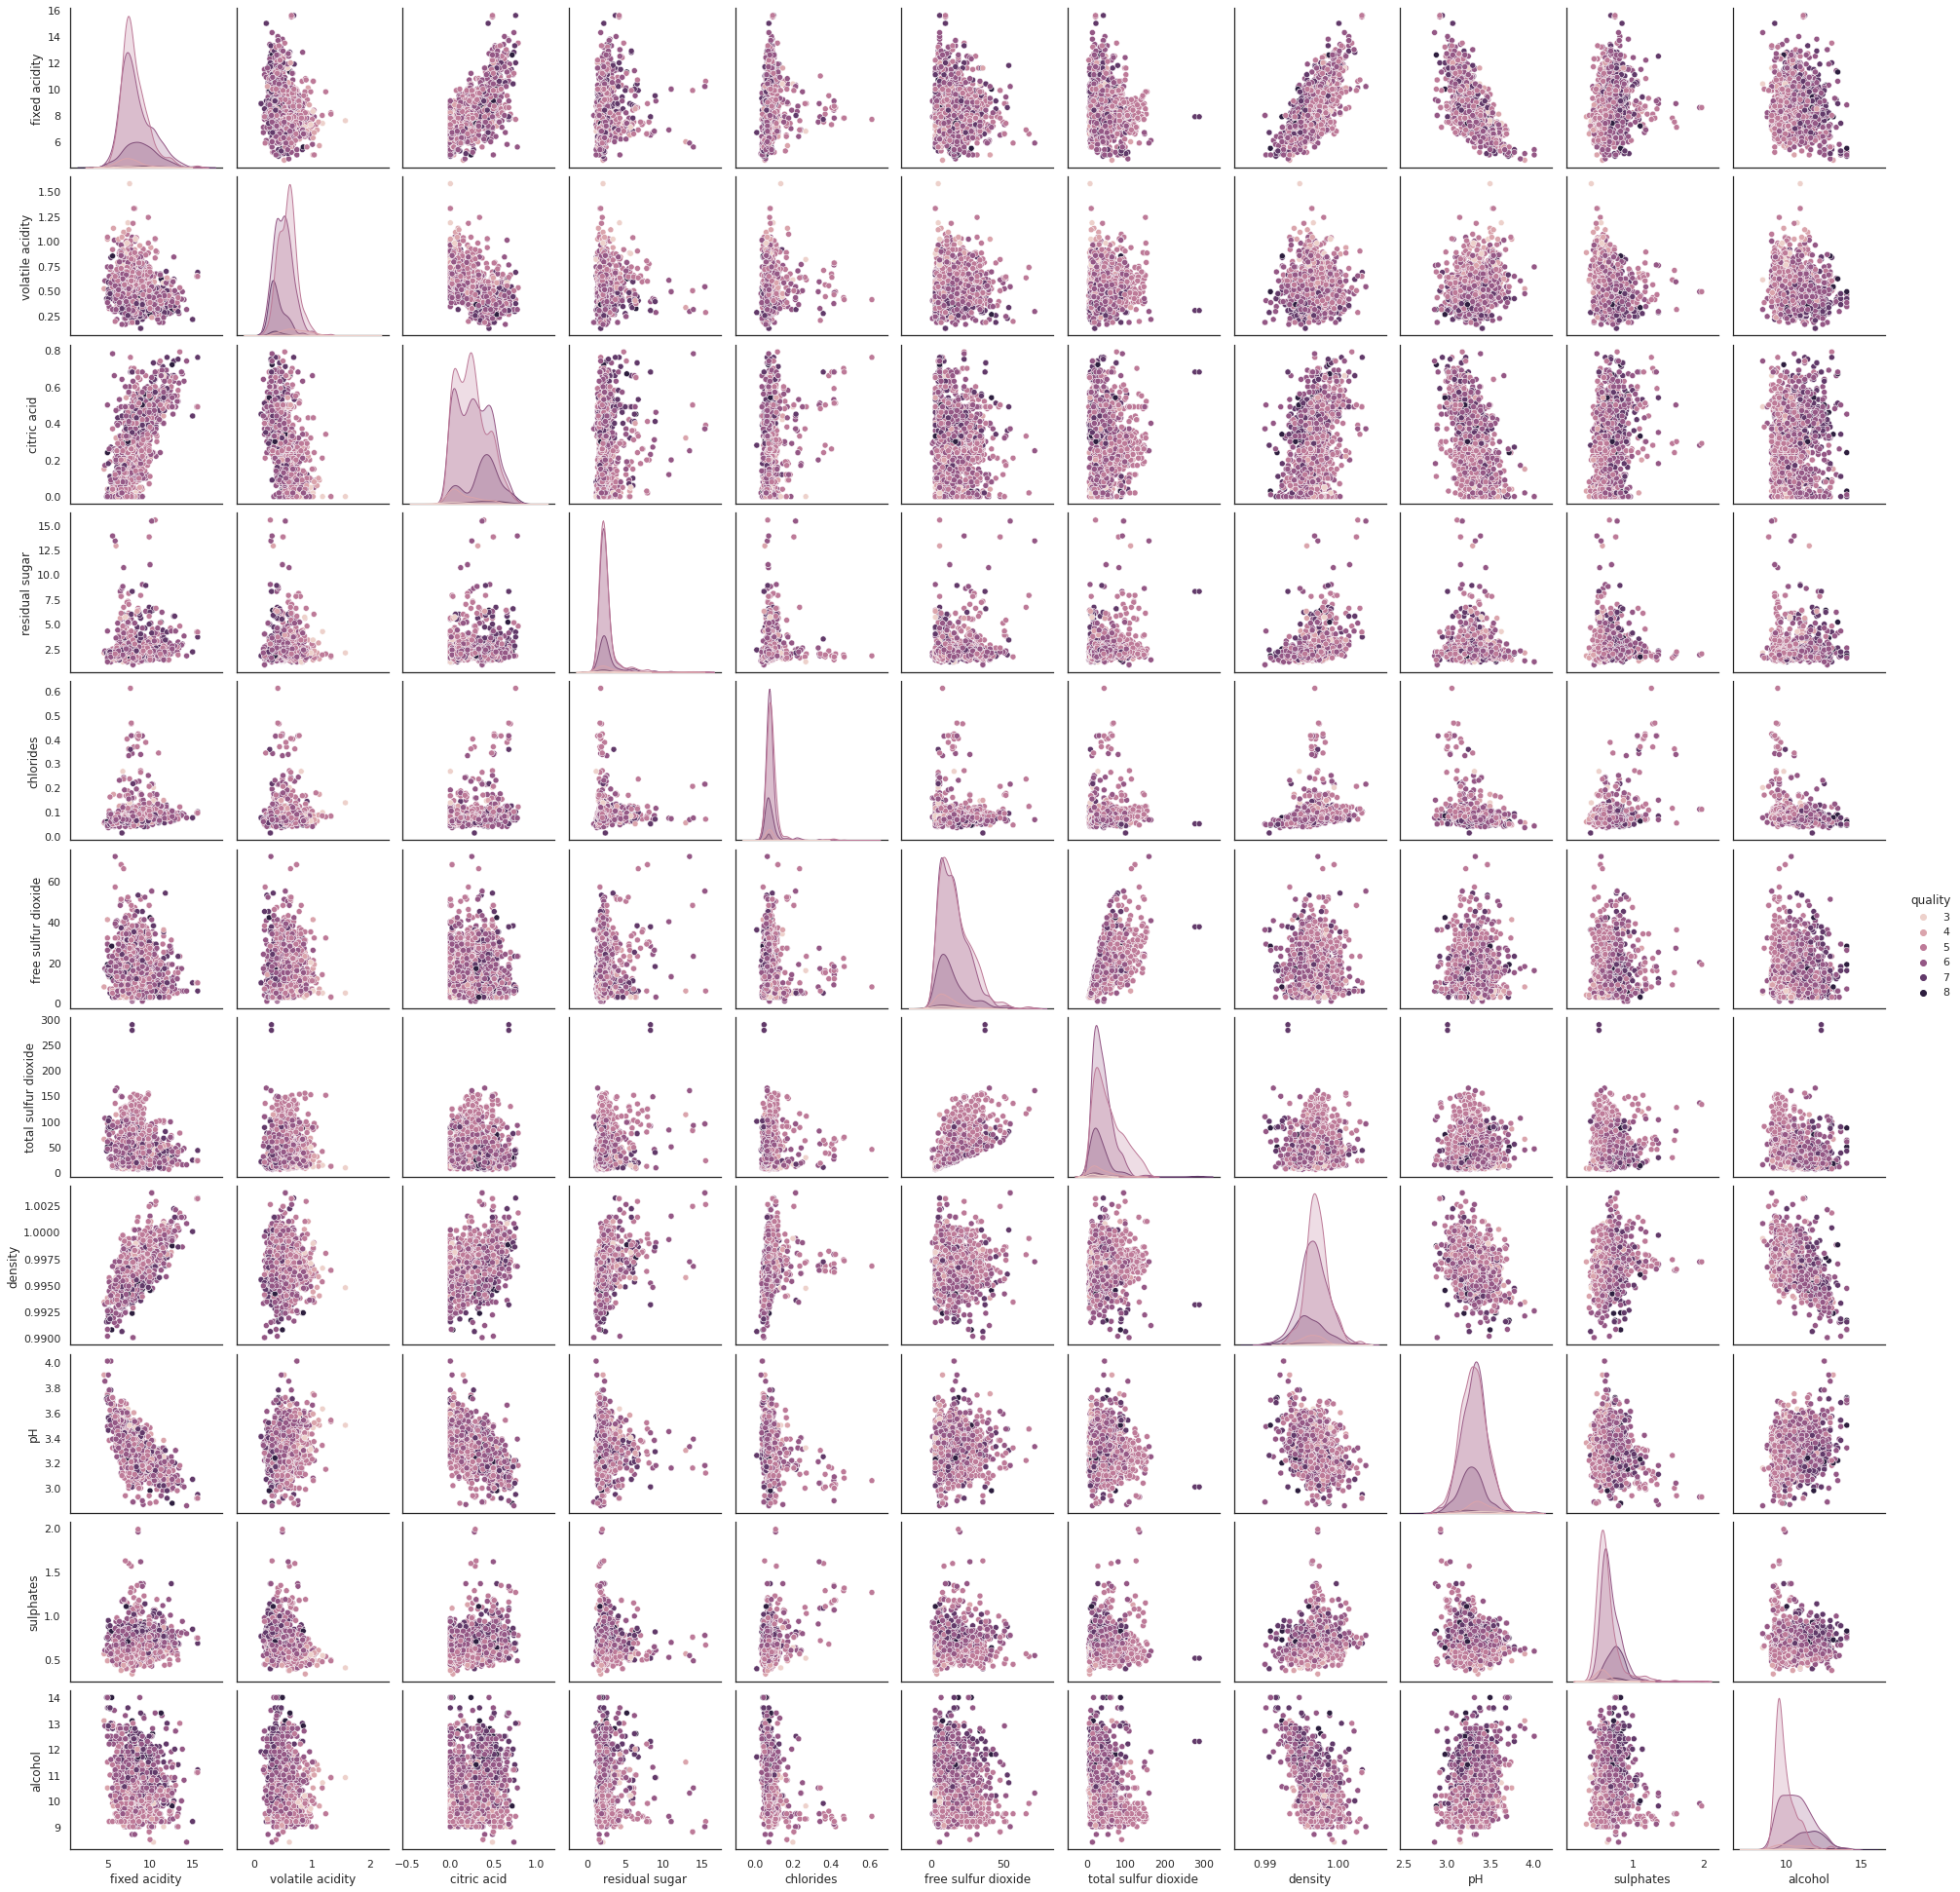

In [6]:
# For each pair of features (columns) in the dataset, we can visualize the scatter plot for each pair 
# along with the feature’s histogram along the diagonal 🚬
sns.pairplot(df, hue="quality")
plt.show()

#### **Observations** 🦕
* As observed, data isn't scattered to a very large extent. So we can apply linear regression ⛩️
* Mostly the given data has a wine quality of 5 & 6 🛕

### **Outlier Detection 💰**

In [7]:
fig = make_subplots(rows=4, cols=3)

fig.add_trace(
    go.Box(x=df["fixed acidity"]),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df["volatile acidity"]),
    row=1, col=2
)

fig.add_trace(
    go.Box(x=df["citric acid"]),
    row=1, col=3
)

fig.add_trace(
    go.Box(x=df["chlorides"]),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=df["free sulfur dioxide"]),
    row=2, col=2
)

fig.add_trace(
    go.Box(x=df["total sulfur dioxide"]),
    row=2, col=3
)

fig.add_trace(
    go.Box(x=df["residual sugar"]),
    row=3, col=1
)

fig.add_trace(
    go.Box(x=df["density"]),
    row=3, col=2
)

fig.add_trace(
    go.Box(x=df["sulphates"]),
    row=3, col=3
)

fig.add_trace(
    go.Box(x=df["pH"]),
    row=4, col=1
)

fig.add_trace(
    go.Box(x=df["alcohol"]),
    row=4, col=2
)


# Update xaxis properties
fig.update_xaxes(title_text="Fixed Acidity", row=1, col=1)
fig.update_xaxes(title_text="Volatile Acidity", row=1, col=2)
fig.update_xaxes(title_text="Citric Acid", row=1, col=3)
fig.update_xaxes(title_text="Chlorides", row=2, col=1)
fig.update_xaxes(title_text="Free Sulpher Dioxide", row=2, col=2)
fig.update_xaxes(title_text="Total Sulfur Sioxide", row=2, col=3)
fig.update_xaxes(title_text="Residual Sugar", row=3, col=1)
fig.update_xaxes(title_text="Density", row=3, col=2)
fig.update_xaxes(title_text="Sulphates", row=3, col=3)
fig.update_xaxes(title_text="pH", row=4, col=1)
fig.update_xaxes(title_text="Alcohol", row=4, col=2)


fig.update_layout(title = "Outlier Inspection", showlegend=False, autosize = True, width=1000, height=1000)
fig.show()


#### **Observations** 🦕
* Our data has a large amount of outliers. It can disturb our prediction to some extend ⚔️.

### **Data Correlations 🔮**

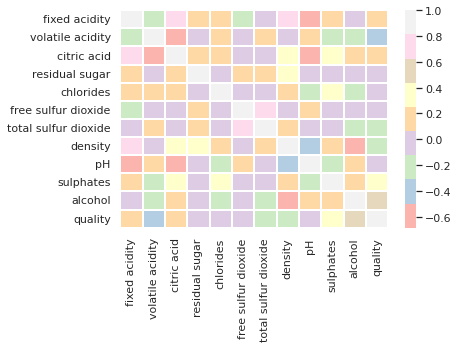

In [8]:
sns.heatmap(df.corr(), cmap='Pastel1',linewidths=2)
plt.show()

## **Linear Regression Model with Gradient Descent** 🦊
-----------------------

### **Data Preprocessing 🏺**

#### All data is in numeric form, no need for any preprocessing ✔️

### **Recognizing Features & Targets** 🦏

In [9]:
# Splitting features & targets 🌱
# Feature Data 
x = df.iloc[:,0:11]
# Target Data 
y = df.iloc[:,-1] 

### **Data Train & Test Split** 🍂

In [10]:
# Splitting data into train and test datasets 🍂
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Scikit-learn Mutiple Linear Regression Model 🐙**

In [12]:
# Training data on Linear Regression Algorithm 🛍️
lr = LinearRegression()
# Model Training 📞
lr.fit(X_train, Y_train)

LinearRegression()

#### **Model Evaluation** 🗿

In [13]:
# Model prediction 💎
pred = lr.predict(X_test)
# R Square value to check credibility of the model 🚧
r2Value = r2_score(Y_test,pred)
print("r2 score value : ",r2Value)

r2 score value :  0.3909278582623118


### **Gradient Descent Mutiple Linear Regression** 🐋

In [14]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=20):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [15]:
gdr = GDRegressor(epochs= 300,learning_rate=0.1)

In [16]:
gdr.fit(X_train,Y_train)

In [17]:
pred1 = gdr.predict(X_test)

In [18]:
# R Square value to check credibility of the model 🚧
r2Value = r2_score(Y_test,pred1)
print("r2 score value : ",r2Value)

r2 score value :  0.3907653115527234
